In [1486]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

stock1 = pd.read_csv('./security1.csv')
stock2 = pd.read_csv('./security2.csv')

def format_my_nanos(nanos):
    dt = datetime.fromtimestamp(nanos / 1e9)
    return dt

In [1487]:
stock1['TimeFixed'] = stock1['Time'].apply(lambda x:format_my_nanos(x));
# stock1 = stock1.drop_duplicates(subset='Time', keep="first")
stock1.reset_index(drop=True, inplace=True)
stock2['TimeFixed'] = stock2['Time'].apply(lambda x:format_my_nanos(x));
# stock2 = stock2.drop_duplicates(subset='Time', keep="first")
stock2.reset_index(drop=True, inplace=True)
stock1 = stock1.sort_values(by=['Time'])
stock2 = stock2.sort_values(by=['Time'])
display(stock1.head())

display(stock2.head())

,Time,Price,TimeFixed
0,1.520607e+18,2753.455357,2018-03-09 16:45:00.006340
1,1.520607e+18,2753.455357,2018-03-09 16:45:00.006340
2,1.520607e+18,2753.457831,2018-03-09 16:45:00.006384
3,1.520607e+18,2753.460366,2018-03-09 16:45:00.006467
4,1.520607e+18,2753.462963,2018-03-09 16:45:00.006810


,Time,Price,TimeFixed
0,1.520607e+18,275.528330,2018-03-09 16:45:00.017839
1,1.520607e+18,275.528330,2018-03-09 16:45:00.017839
2,1.520607e+18,275.528569,2018-03-09 16:45:00.017916
3,1.520607e+18,275.528330,2018-03-09 16:45:00.017945
4,1.520607e+18,275.527496,2018-03-09 16:45:00.044900


# Stocks graph 

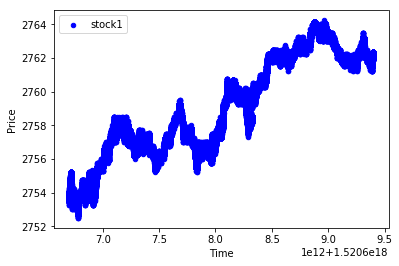

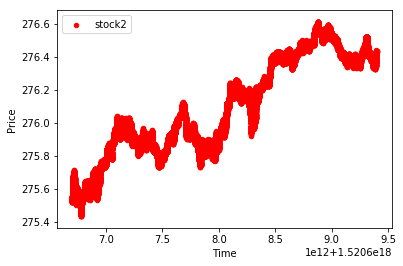

In [1488]:
stock1.plot(kind='scatter',x='Time',y='Price',color='blue',label="stock1")
plt.show()
stock2.plot(kind='scatter',x='Time',y='Price',color='red',label="stock2")
plt.show()

Looks almost identical

# Stats

Stock 1 :

In [1489]:
print("Mean :" + str(stock1['Price'].mean()) )
print("Variance :" + str(stock1['Price'].var()) )
print("Std :" + str(stock1['Price'].std()) )

Mean :2758.5368153549575
Variance :9.323891469086846
Std :3.0535047845200514


In [1490]:
stock1.loc[stock1['Price'].idxmax()]

Time                        1.52061e+18
Price                           2764.24
TimeFixed    2018-03-09 17:22:45.604903
Name: 194106, dtype: object

In [1491]:
stock1.loc[stock1['Price'].idxmin()]

Time                        1.52061e+18
Price                            2752.5
TimeFixed    2018-03-09 16:46:19.972284
Name: 13677, dtype: object

Stock2:

In [1492]:
print("Mean :" + str(stock2['Price'].mean()) )
print("Variance :" + str(stock2['Price'].var()) )
print("Std :" + str(stock2['Price'].std()) )

Mean :276.0657842062767
Variance :0.08795830578572998
Std :0.29657765557393223


In [1493]:
stock2.loc[stock2['Price'].idxmax()]

Time                        1.52061e+18
Price                           276.609
TimeFixed    2018-03-09 17:21:18.708740
Name: 62841, dtype: object

In [1494]:
stock2.loc[stock2['Price'].idxmin()]

Time                        1.52061e+18
Price                           275.435
TimeFixed    2018-03-09 16:46:19.655760
Name: 3342, dtype: object

Correlation pearson:

In [1495]:
stock1.corrwith(stock2, axis = 0) 

Time     0.998476
Price    0.794877
dtype: float64

In [1496]:
intersected_time = pd.merge(stock1, stock2,on=['TimeFixed'], how='inner')
print(intersected_time.head())

         Time_x      Price_x                  TimeFixed        Time_y     Price_y
0  1.520607e+18  2754.789823 2018-03-09 16:45:12.798534  1.520607e+18  275.655056
1  1.520607e+18  2753.194215 2018-03-09 16:46:01.694506  1.520607e+18  275.504234
2  1.520607e+18  2754.005495 2018-03-09 16:46:52.582804  1.520607e+18  275.593017
3  1.520607e+18  2753.694444 2018-03-09 16:47:22.518252  1.520607e+18  275.578891
4  1.520607e+18  2753.694444 2018-03-09 16:47:22.518252  1.520607e+18  275.573330


In [1497]:
timeCombined = [stock1,stock2]
res = pd.concat(timeCombined,ignore_index=True)
print(res.head())

           Time        Price                  TimeFixed
0  1.520607e+18  2753.455357 2018-03-09 16:45:00.006340
1  1.520607e+18  2753.455357 2018-03-09 16:45:00.006340
2  1.520607e+18  2753.457831 2018-03-09 16:45:00.006384
3  1.520607e+18  2753.460366 2018-03-09 16:45:00.006467
4  1.520607e+18  2753.462963 2018-03-09 16:45:00.006810


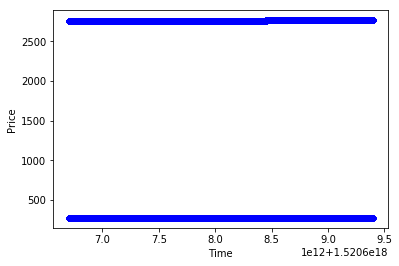

In [1498]:
res.plot(kind='scatter',x='Time',y='Price',color='blue')
plt.show()

As we can see its hard to see both stocks on the same graph therefore we will make them closer by multiply stock 2 by 10

In [1499]:
stock3 = stock2
stock3['Price'] = stock2['Price'].apply(lambda x: x * 10);
print("Mean :" + str(stock3['Price'].mean()) )
print("Variance :" + str(stock3['Price'].var()) )
print("Std :" + str(stock3['Price'].std()) )

Mean :2760.6578420627593
Variance :8.795830578572753
Std :2.9657765557392812


Stats very close to stock 1....

In [1500]:
duplicateRowsDF = resNew[resNew.duplicated(['Time'])]
display(duplicateRowsDF.head())

,Time,Price,TimeFixed
1,1.520607e+18,2753.455357,2018-03-09 16:45:00.006340
15,1.520607e+18,2753.305000,2018-03-09 16:45:00.013727
13,1.520607e+18,2753.277500,2018-03-09 16:45:00.013727
14,1.520607e+18,2753.500000,2018-03-09 16:45:00.013727
220556,1.520607e+18,2755.283305,2018-03-09 16:45:00.017839


There are alot of sampels which have the same epoch time ( on the same stock ) but have diffrent price, for example lines 13-15

In [1501]:
intersected_time = pd.merge(stock1, stock2,on=['Time'], how='inner')
print(intersected_time)

            Time      Price_x                TimeFixed_x      Price_y                TimeFixed_y
0   1.520607e+18  2753.194215 2018-03-09 16:46:01.694506  2755.042341 2018-03-09 16:46:01.694506
1   1.520607e+18  2754.005495 2018-03-09 16:46:52.582804  2755.930169 2018-03-09 16:46:52.582804
2   1.520607e+18  2753.694444 2018-03-09 16:47:22.518252  2755.788913 2018-03-09 16:47:22.518252
3   1.520607e+18  2753.694444 2018-03-09 16:47:22.518252  2755.733303 2018-03-09 16:47:22.518252
4   1.520607e+18  2754.687963 2018-03-09 16:48:30.537997  2756.554538 2018-03-09 16:48:30.537997
5   1.520607e+18  2757.532186 2018-03-09 16:51:14.592989  2759.229651 2018-03-09 16:51:14.592989
6   1.520607e+18  2757.609477 2018-03-09 16:52:00.336464  2759.249781 2018-03-09 16:52:00.336464
7   1.520607e+18  2757.310166 2018-03-09 16:53:06.598199  2759.489490 2018-03-09 16:53:06.598199
8   1.520607e+18  2757.176230 2018-03-09 16:53:07.626130  2759.459920 2018-03-09 16:53:07.626130
9   1.520608e+18  2756.101223 

As we can see here, Both stocks share 16 point that measured on the same time.

# Stocks on the same graph after modification

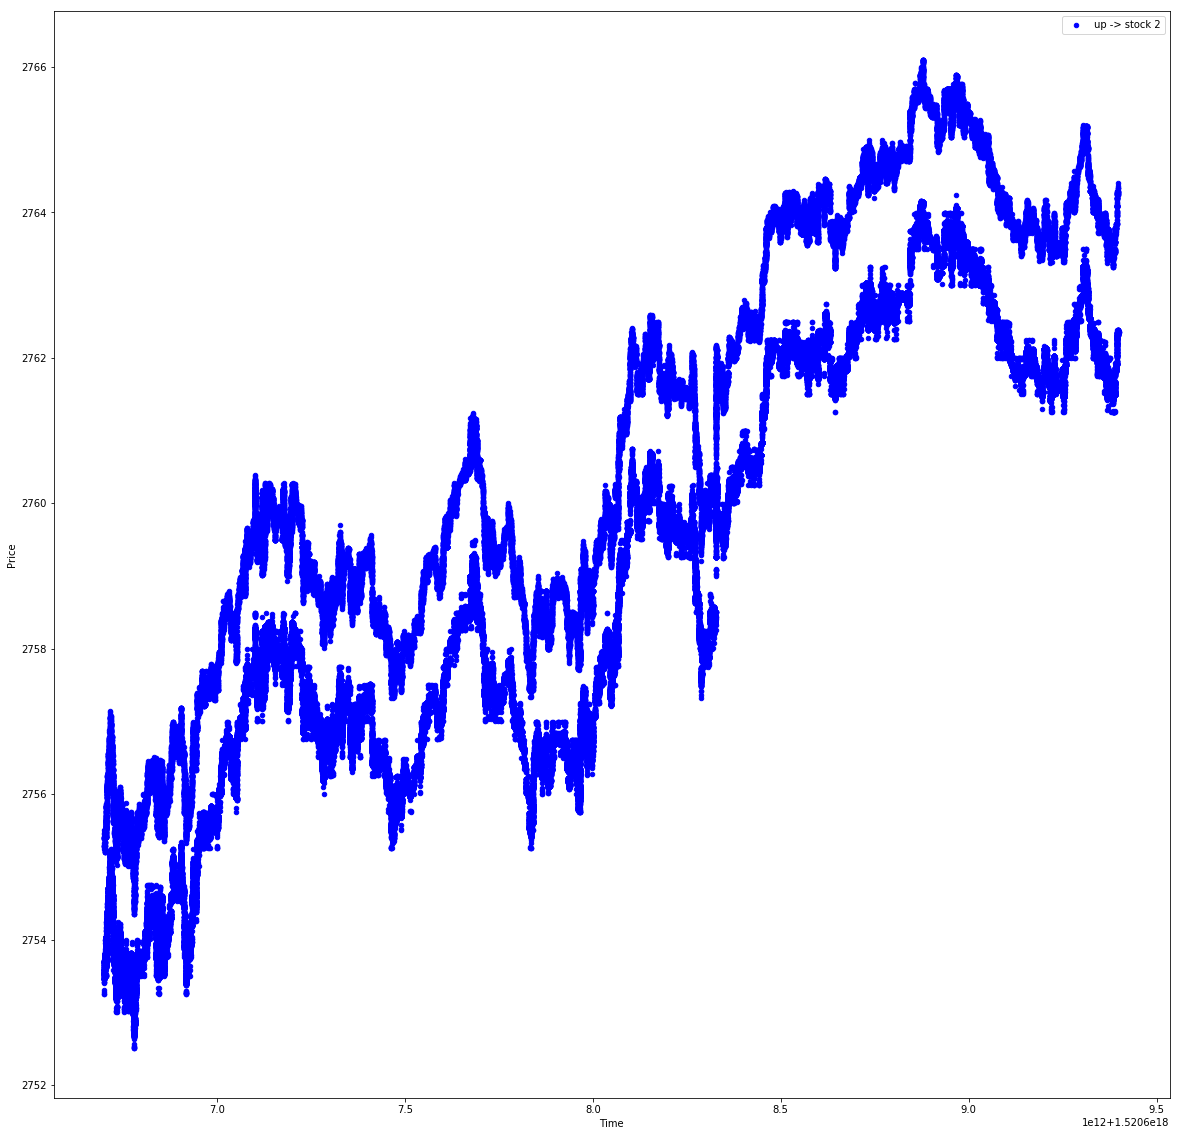

In [1502]:

test = [stock1,stock3]

resNew = pd.concat(test,ignore_index=True)
resNew = resNew.sort_values(by=['Time'])
resNew.plot(kind='scatter',x='Time',y='Price',color='blue',figsize=(20,20), label="up -> stock 2")

plt.show()

Here we can see the stocks price = f(time), it looks almost as if its the same stock...
Stock 1 (bottom) looks like its leading....
I wonder if its the same stock on diffrent exchage, arbitrage 

#  Split the data into batches 

Here I split the data into batches and calc from each batch min and max.
As min and max are points which tell us that the stock change direction.
So I tried to find points that occur close to each other (between the stocks).

In [1503]:
stock1.reset_index(drop=True, inplace=True)
stock2.reset_index(drop=True, inplace=True)
size = 4500
list_of_stock1 = [stock1.loc[i:i+size-1,:] for i in range(0, len(stock1),size)]
size = 1500
list_of_stock2 = [stock2.loc[i:i+size-1,:] for i in range(0, len(stock2),size)]

In [1504]:
def arrMinMax(myList):
    arr1 = [None] * len(myList)
    for idx,list in enumerate(myList):
        arr1[idx] =[list.TimeFixed.min(),list.TimeFixed.max(),list.Price.max(),list.loc[list['Price'].idxmax()]['TimeFixed'],
                    list.Price.min(),list.loc[list['Price'].idxmin()]['TimeFixed']] 
    
    data = pd.DataFrame(arr1, columns = ['StartTime Interval','End Time Interval','Max Value',
                                         'Max Value Time','Min Value','Min Value Time']) 
    return data

list_min_max1 = arrMinMax(list_of_stock1)
list_min_max1.loc[list_min_max1['Max Value'].idxmin()]
display(list_min_max1.head())
len(list_min_max1)

,StartTime Interval,End Time Interval,Max Value,Max Value Time,Min Value,Min Value Time
0,2018-03-09 16:45:00.006340,2018-03-09 16:45:23.187370,2755.246528,2018-03-09 16:45:17.849284,2753.251429,2018-03-09 16:45:00.131236
1,2018-03-09 16:45:23.187553,2018-03-09 16:45:48.596299,2754.242424,2018-03-09 16:45:23.239817,2753.005208,2018-03-09 16:45:33.860218
2,2018-03-09 16:45:48.596451,2018-03-09 16:46:19.040804,2753.989130,2018-03-09 16:45:57.584087,2752.504902,2018-03-09 16:46:18.755257
3,2018-03-09 16:46:19.040956,2018-03-09 16:46:53.636217,2754.451613,2018-03-09 16:46:53.634924,2752.504601,2018-03-09 16:46:19.972284
4,2018-03-09 16:46:53.636225,2018-03-09 16:47:26.703041,2754.747845,2018-03-09 16:47:03.102608,2753.256757,2018-03-09 16:47:24.531002


50

In [1505]:
list_min_max2 = arrMinMax(list_of_stock2)
display(list_min_max2.head())
len(list_min_max2)

,StartTime Interval,End Time Interval,Max Value,Max Value Time,Min Value,Min Value Time
0,2018-03-09 16:45:00.017839,2018-03-09 16:45:30.458011,2757.149407,2018-03-09 16:45:16.163459,2755.204385,2018-03-09 16:45:01.706746
1,2018-03-09 16:45:30.458011,2018-03-09 16:46:12.018839,2756.100006,2018-03-09 16:45:40.654685,2755.005192,2018-03-09 16:46:07.443958
2,2018-03-09 16:46:12.018868,2018-03-09 16:46:52.341686,2756.024857,2018-03-09 16:46:51.416835,2754.349925,2018-03-09 16:46:19.655760
3,2018-03-09 16:46:52.341686,2018-03-09 16:47:37.468836,2756.506025,2018-03-09 16:47:11.809947,2755.407762,2018-03-09 16:47:24.048224
4,2018-03-09 16:47:37.468870,2018-03-09 16:48:31.185195,2757.188907,2018-03-09 16:48:24.208297,2755.349960,2018-03-09 16:47:38.316804


51

In [1506]:
def maxTimes(myList,col):
    arr1 = [None] * len(myList)
    for idx,list in myList.iterrows():
        arr1[idx] = list[col]
    
    return arr1

max1 = maxTimes(list_min_max1,'Max Value Time')
min1 = maxTimes(list_min_max1,'Min Value Time')

In [1507]:
max2 = maxTimes(list_min_max2,'Max Value Time')
min2 = maxTimes(list_min_max2,'Min Value Time')

In [1508]:
def removerNone(arr):
    res = [] 
    for val in arr: 
        if val != None : 
            res.append(val) 
    return res

Look for points that occur on the same sec for example -> max point of stock1 and corresponding max point of stock2

In [1509]:
def matchP(first,sec):
    arr = [None] * (len(first) + len(sec))
    count = 0
    for i in range(len(first)):
        for j in range(len(sec)):
            dif =(sec[j] - first[i]).total_seconds() 
            if ((dif < 1) and ( dif > 0)):
                arr[count] = ((first[i],sec[j]))
                count = count +1
    return removerNone(arr)

max12 = matchP(max1,max2)
min12 = matchP(min1,min2)

max21 = matchP(max2,max1)
min21 = matchP(min2,min1)
pd.DataFrame(max21, columns = ['First','Second']).head() 

,First,Second
0,2018-03-09 16:55:28.224888,2018-03-09 16:55:28.618601
1,2018-03-09 17:01:21.870661,2018-03-09 17:01:22.658009
2,2018-03-09 17:08:23.224353,2018-03-09 17:08:23.967318
3,2018-03-09 17:12:08.544920,2018-03-09 17:12:08.573666
4,2018-03-09 17:14:19.885070,2018-03-09 17:14:20.728502


Calc the diffrance beteen these points in microseconds

In [1510]:
def diffInMicro(list):
    diff = [None] * len(list)
    for i in range(len(list)):
        diff[i] = ((list[i][1] -list[i][0]).total_seconds() * 1000 )
     
    return diff
diffInMicro(max12)
data = pd.DataFrame(diffInMicro(max12), columns = ['Delta(micro)'])
data.head()

,Delta(micro)
0,11.077
1,40.014
2,13.011
3,9.015
4,135.474


In [1511]:
lead1 = np.concatenate((diffInMicro(max12), diffInMicro(min12)), axis=0)
lead2 = np.concatenate((diffInMicro(max21), diffInMicro(min21)), axis=0)
print("stock1 before stock2 : ", len(lead1))
print("stock2 before stock1 : ", len(lead2))

stock1 before stock2 :  18
stock2 before stock1 :  14


Therefore, we can conclude that stock1 is leading and stock2 is following

# Time difference

Took the avarege time of those points (in microseconds), in order to determine the delta between the stocks.

In [1512]:
np.mean(lead1)

298.35572222222225

Stock 1 is ahead by 300 microseconds

In [1513]:
# np.mean(lead2)

As I read about latency arbitrage ,  I learned there is a known delay of 350 microseconds between Chicago and Nyc , therefore its seems like stock1 is closer to that "famous" delay!